# **Análisis Exploratorio de Datos - El Arte de Hacer Preguntas**
Lucero Díaz Ortega A01199346

# **Introducción**
El hundimiento del Titanic ha sido uno de los eventos históricos más recordados del siglo XX, puesto que en su momento este llegó a ser el barco más grande y lujoso jamás creado, el cual presumía ser casi insurmegible. Lamentablemente, después del choque con un iceberg, este mismo no tardó más de 3 horas en hundirse durante la madrugada del 15 de abril de 1992. Debido a diversas negligencias, tales como el tiempo desperdiciado antes de realmente empezar a evacuar, la falta de botes para todos los pasajeros, etc., han hecho que este suceso pase a la historia como una de las mayores tragedias marítimas jamás vistas.

A lo largo de los últimos años se han recopilado varios datos acerca de este incidente, y específicamente en esta ocasión analizaremos una serie de datos pertenecientes a los pasajeros a bordo del Titanic: nombre, id, sexo, edad, clase, etc. Con esta información sería interesante el resolver para incógnitas alrededor del evento: ¿se siguió el protocolo "mujeres y niños primero"?, ¿Aquellos que iban en primera clase tuvieron mayor prioridad al momento de la evacuación?, ¿Cuáles son las edades en promedio de los sobrevivientes? Esto y mucho más se espera descubrir a lo largo de este análisis exploratorio.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# **Parte 1: Variación**

## **Age**
Para esta variable se utilizó un boxplot. En este se puede observar que el rango intercuartílico está entre los 20 y 40 años, con una media poco menor a los 30 años. Los outliers consisten en gente mayor a los 64-65 años, por lo que podemos concluir que la gran mayoría de los que se encontraban en el Titanic eran adultos/adultos jóvenes.

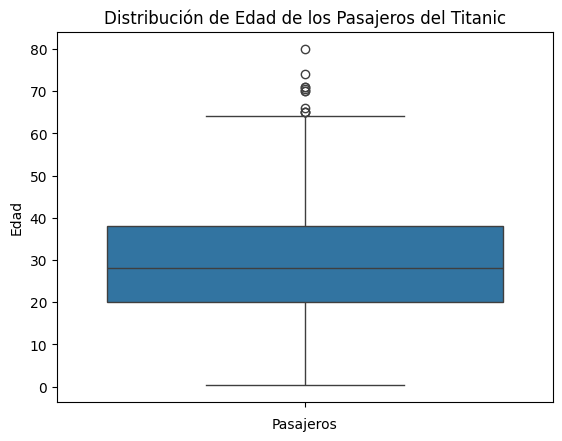

In [ ]:
sns.boxplot(data=titanic, y='Age')
plt.xlabel('Pasajeros')
plt.ylabel('Edad')
plt.title('Distribución de Edad de los Pasajeros del Titanic')
plt.show()

## **Pclass**
En esta tabla de frecuencias podemos observar como la mayor parte de pasajeros pertenecían a la tercera clase, es decir, a la clase trabajadora. La cantidad de pasajeros de clase 1 y 2 ronda aproximadamente por las 200 personas por cada clase, mientras que la clase 3 llega casi a las 500 personas.

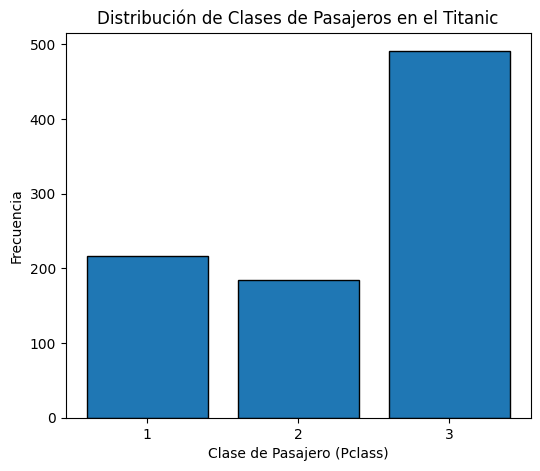

In [ ]:
plt.figure(figsize=(6, 5))
plt.hist(titanic['Pclass'].dropna(), bins=[0.5, 1.5, 2.5, 3.5], edgecolor='black', rwidth=0.8)
plt.xticks([1, 2, 3])
plt.xlabel('Clase de Pasajero (Pclass)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Clases de Pasajeros en el Titanic')
plt.show()

## **Survived**
Para representar de mejor manera la distribución de gente sobreviviente, se hizo un pie chart. Aquí se observa como la mayor parte de los pasajeros registrados no sobrevivió, representando casi 2/3 de la población.

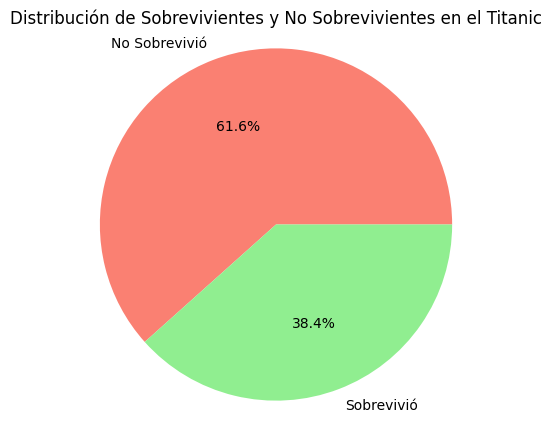

In [ ]:
survived_counts = titanic['Survived'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(survived_counts, labels=['No Sobrevivió', 'Sobrevivió'], autopct='%1.1f%%', colors=['salmon', 'lightgreen'])
plt.title('Distribución de Sobrevivientes y No Sobrevivientes en el Titanic')
plt.axis('equal')
plt.show()

# **Parte 2: Covariación**

## **¿Cuál fue la distribución de edad de los sobrevivientes del Titanic?**
La mayor cantidad de sobrevivientes ronda las edades entre 20 y 40 años, así como también hay una gran cantidad de bebés/niños pequeños en ser parte de la estadística de los sobrevivientes. Sin embargo, hubo pocos sobrevivientes que superaran los 40 años en adelante.

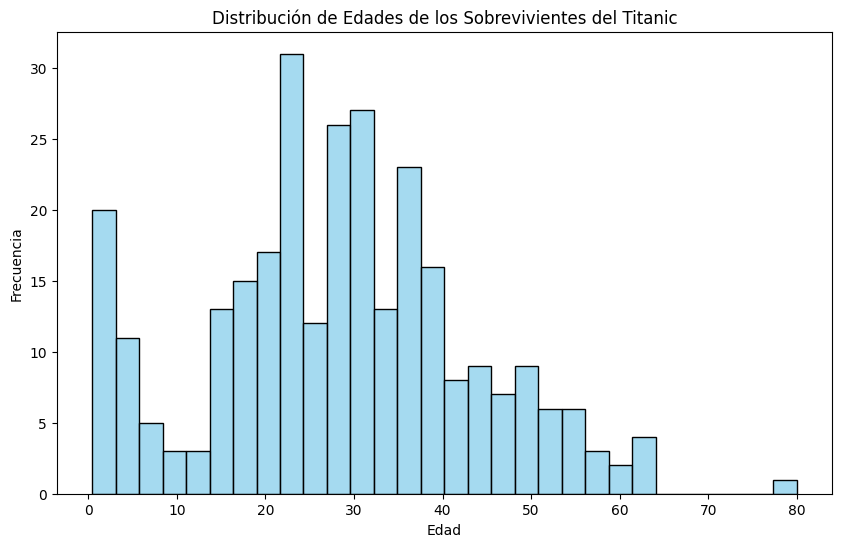

In [ ]:
survivors = titanic[titanic['Survived'] == 1]

plt.figure(figsize=(10, 6))
sns.histplot(survivors['Age'].dropna(), bins=30, color='skyblue')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edades de los Sobrevivientes del Titanic')
plt.show()

## **¿Cómo afecta la edad y la tarifa pagada a la supervivencia de un pasajero?**
Se puede observar que gran cantidad de no sobrevivientes pagaron menos de $100 de tarifa, y mientras más sube la tarifa hay más puntos naranjas comparados con los azules.

Text(0.5, 1.0, 'Relación entre Edad, Tarifa y Supervivencia')

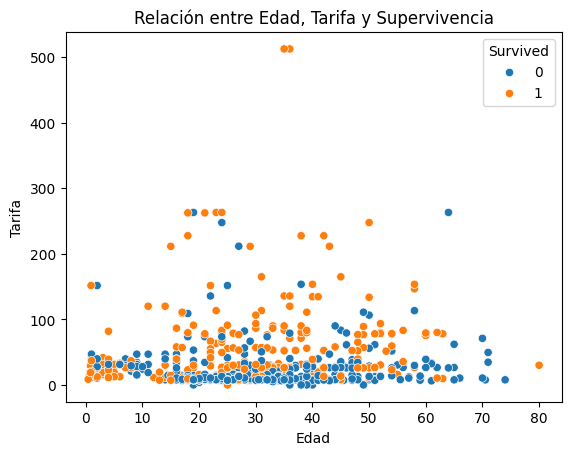

In [ ]:
sns.scatterplot(data=titanic, x='Age', y='Fare', hue='Survived')
plt.xlabel('Edad')
plt.ylabel('Tarifa')
plt.title('Relación entre Edad, Tarifa y Supervivencia')

## **¿Cuál fue la tasa de supervivencia por sexo para cada clase?**
Se observa que la mayor tasa de supervivencia fue el de las mujeres, sin importar la clase a la que pertenecían. Los hombres de la clase 1, comparados a otras clases, tienen una mayor tasa de supervivencia.

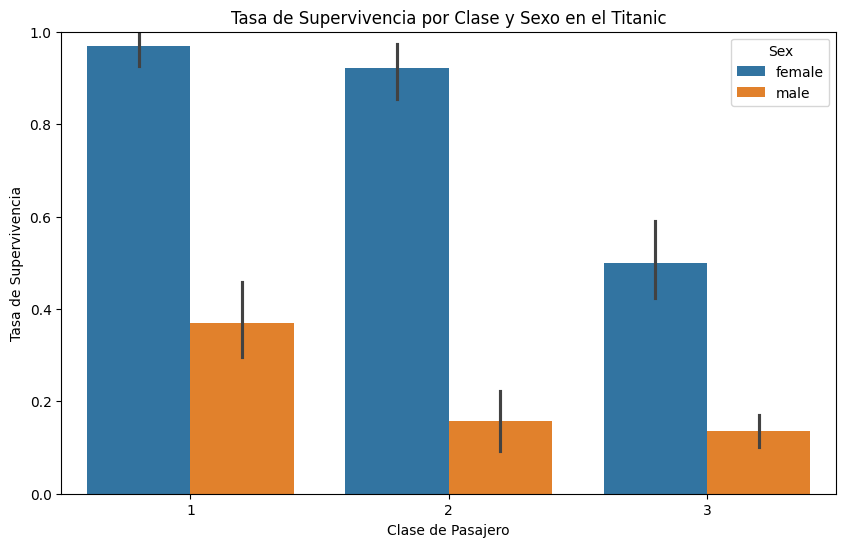

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic)
plt.xlabel('Clase de Pasajero')
plt.ylabel('Tasa de Supervivencia')
plt.title('Tasa de Supervivencia por Clase y Sexo en el Titanic')
plt.ylim(0, 1)
plt.show()

# **Parte 3: Valores Faltantes**
La mayor parte de las variables no tienen valores nulos, a excepción de las variables "Age", "Cabin" y "Embarked. Embarked solo tiene dos valores nulos, por lo que no llega a afectar mucho en el análisis; sin embargo, Age y Cabin tienen más de 100 valores nulos, por lo que llega a afectar de manera considerable las estadísticas y relaciones que se hagan con estas variables; por esta razón, una sugerencia para trabajar con ellos sería estandarizarlos, para que sea más fácil trabajar con las variables. No se observa que sigan algún patrón estos valores nulos.

In [ ]:
# Inspeccionar valores faltantes
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: >

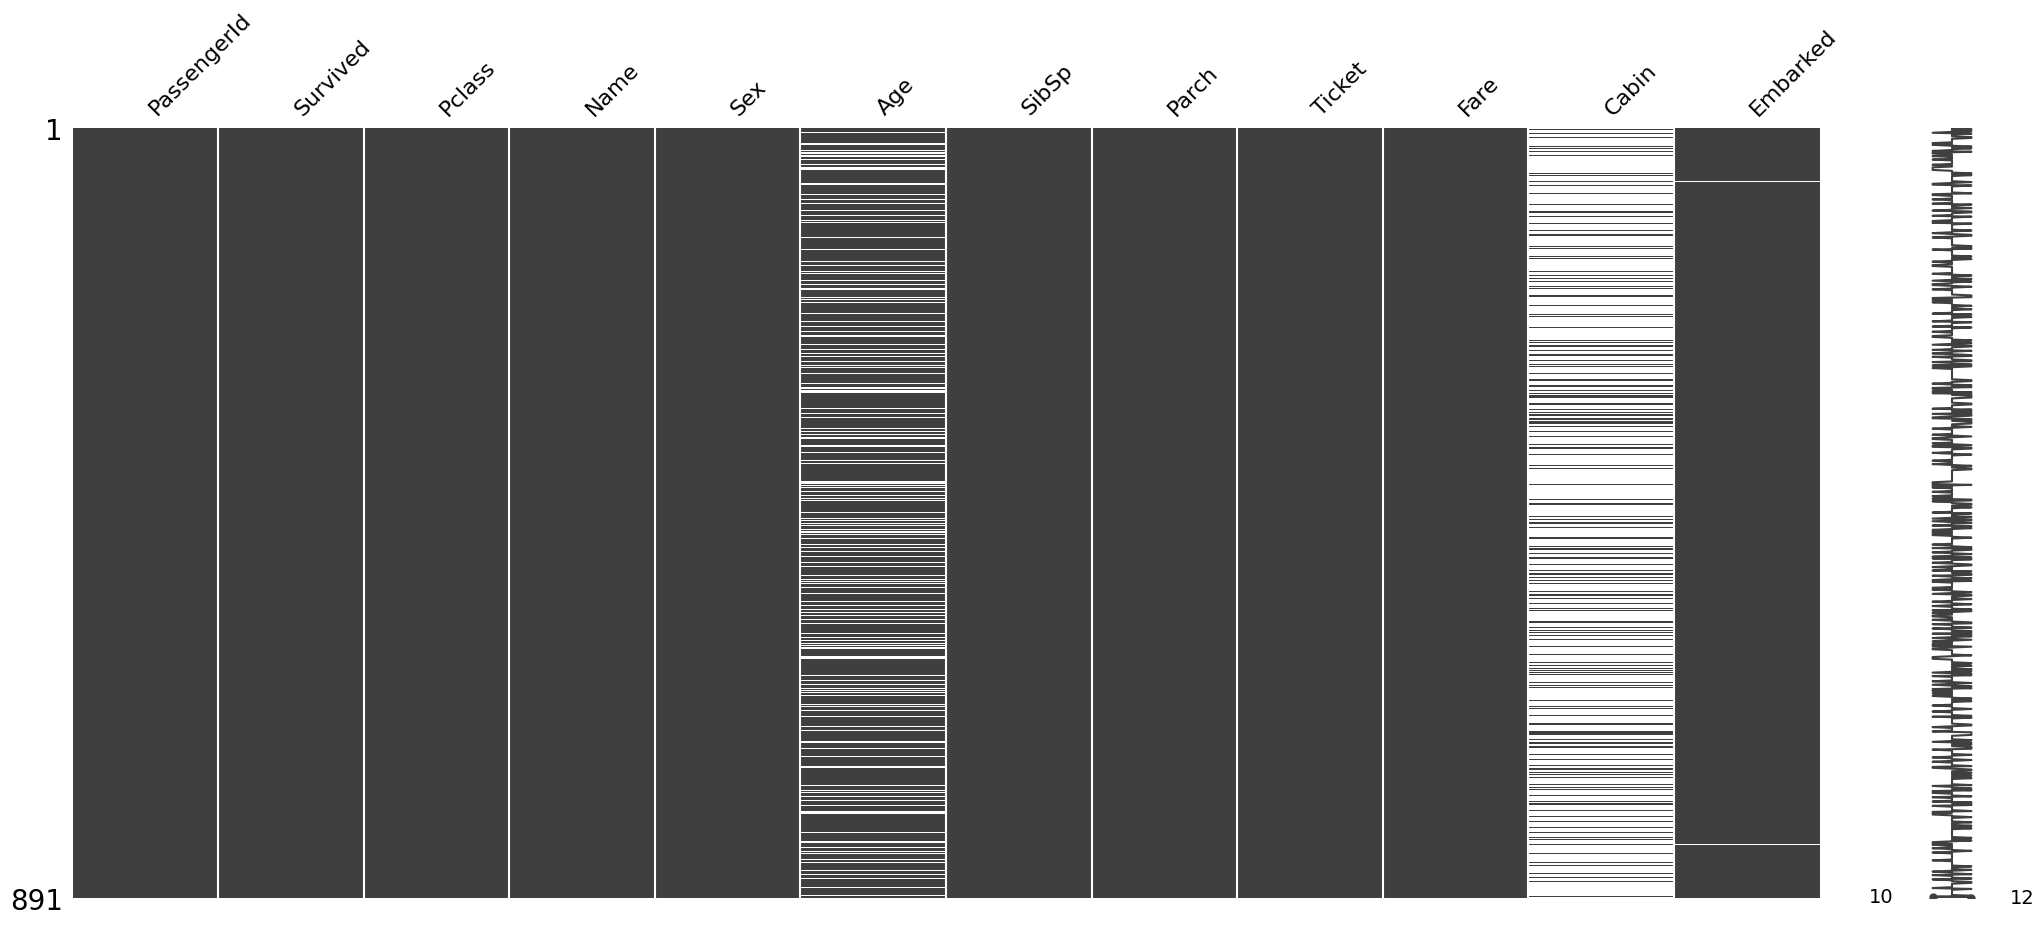

In [ ]:
# Visualizar patrón de valores faltantes
import missingno as msno  # pip install missingno
msno.matrix(titanic)

# **Parte 4: Pregunta Original**

## **¿Los pasajeros hombres que sobrevivieron pagaron más de tarifa en comparación a los que no sobrevivieron?**
Esta pregunta surge a través de las gráficas de las partes anteriores, donde los hombres se mostraban más vulnerables a ser no sobrevivientes, y sin embargo entre este grupo los que tenían una mayor tasa de supervivencia eran aquellos de la clase 1 (la clase con mejor economía). Se realizó un scatterplot para visualizar si existía una relación entre la tarifa y la supervivencia de los pasajeros masculinos. No obstante, se observa que la mayor parte de los sobrevivientes no pagaron una tarifa considerablemente más alta que la de quienes no sobrevivieron, hasta hay pasajeros que pagaron tarifas arriba de 200 y la gran mayoría no sobrevivió. Por lo que se concluye que no hay prueba suficiente para asegurar que existe una relación entre estas variables, es decir, no se puede afirmar que los hombres que pagaron una mayor tarifa recibieron un trato prioritario al momento de la evacuación del barco.

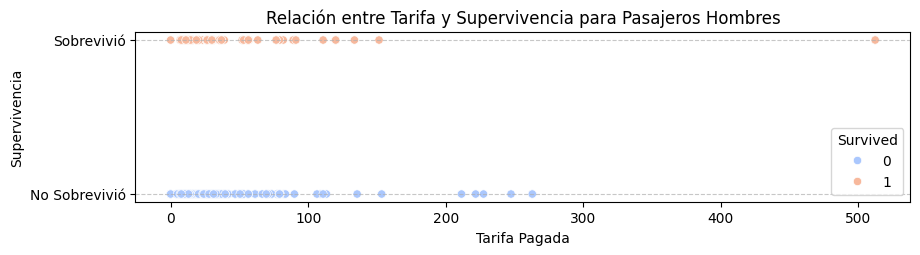

In [ ]:
male_passengers = titanic[titanic['Sex'] == 'male']

plt.figure(figsize=(10, 2.2))
sns.scatterplot(data=male_passengers, x='Fare', y='Survived', hue='Survived', palette='coolwarm')
plt.xlabel('Tarifa Pagada')
plt.ylabel('Supervivencia')
plt.title('Relación entre Tarifa y Supervivencia para Pasajeros Hombres')
plt.yticks([0, 1], ['No Sobrevivió', 'Sobrevivió'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **Reflexión Final**
Durante este análisis exploratorio me enfrenté a varias dificultades, puesto que había muchas variables que analizar y no sabía en un principio cuál sería la mejor representación gráfica para cada ejercicio. Considero que lo que se me complicó más fue encontrar las covarianzas y plantear mi pregunta original, puesto que para esta última tenía que considerar el trabajo hecho anteriormente además de evitar usar las variables que tuvieran datos nulos. A lo largo del proceso aprendí muchas cosas, mayormente los comandos para realizar las gráficas a través de pandas, matplotlib y seaborn. Todo esto acompañado de una mayor comprensión de cómo relacionar dos o más variables en una sola visualización.